# DESCRIPTIVE ANALYSIS OF THE BIPARTITE NETWORK

**Authors**
- Alejandro Urrego Lopéz
- Cesar Augusto Prieto Sarmiento

In this Jupyter workbook you will find the development of the Descriptive analysis of the Bipartite Network, from the import of the necessary libraries to the preparation of the data and the methods used for the corresponding analysis. 

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import random 
from plotnine import *
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import pickle
import matplotlib.colors as mcolors
import os

# Set the desired directory path
# path = r"C:\Users\Pc\Desktop\Redes\Data"
# os.chdir(path)

## Definition of important functions

In [2]:
import hashlib
# codigo adaptado de chat gpt
def get_color(integer, alpha=1.0):
    # Convert the integer to a unique string using hashing
    hash_object = hashlib.sha256(str(integer).encode())
    hex_dig = hash_object.hexdigest()
    # Convert the hexadecimal hash to RGB values
    r = int(hex_dig[:2], 16) % 256
    g = int(hex_dig[2:4], 16) % 256
    b = int(hex_dig[4:6], 16) % 256
    # Format RGB values into a color string
    color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    # Return RGB values and alpha
    return (r / 255, g / 255, b / 255, alpha)
def get_colors_for_list(integer_list, alpha=1.0):
    colors = []
    for integer in integer_list:
        color = get_color(integer, alpha=alpha)
        colors.append(color)
    return colors


In [3]:

# adaptado de chat gpt 
def adjustcolor(color_name, alpha):
    # Convertir nombre de color a RGB
    rgb = mcolors.CSS4_COLORS.get(color_name)
    if rgb is None:
        raise ValueError(f"El color '{color_name}' no es válido.")
    
    # Convertir RGB a hexadecimal
    r, g, b = mcolors.to_rgb(rgb)
    hex_color = f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    
    # Agregar canal alpha
    return f'{hex_color}{int(255 * alpha):02x}'



## Import and manipulation of the database 

In [4]:
data_folder_path = os.path.dirname(os.getcwd()) + os.sep + 'Data' + os.sep

In [5]:
usuarios=pd.read_csv(data_folder_path + 'animelist.csv',
                     na_values=["Unknown"],
                     header=0,
                     usecols=[0,1,2,3],
                     names=["user_id","anime_id","rating" ,"watching_status"],
                     dtype={"user_id":str,"anime_id":str,"rating":np.float64,"watching_status":np.float64})

In [6]:
IndicesMuestra=pd.read_csv(data_folder_path + 'muestras.txt',dtype={'muestras':str})

In [7]:
IndicesMuestra=IndicesMuestra['muestras']

In [8]:
anime=pd.read_csv(data_folder_path + 'anime.csv', dtype={'MAL_ID':str})

In [9]:
anime['id']=anime["MAL_ID"]
anime=anime.loc[:,["id","Name","Score","Genres"]]
anime

,id,Name,Score,Genres
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural"
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy"


In [10]:
IndicesMuestra

0         308
1        1422
2           7
3       31670
4       28957
        ...  
1255    37695
1256    32058
1257    37752
1258    38074
1259      187
Name: muestras, Length: 1260, dtype: object

In [11]:
anime['Genres'] = anime['Genres'].fillna('').astype(str) 

Se filtra el DataFrame de los usuarios tomando únicamente las filas que tengan el ID de los animes y el estado "completo", es decir, que ya terminaron de ver la serie.


In [12]:
anime = anime.query("id in @ IndicesMuestra").sort_values(by=["id"], ascending=True).reset_index(drop=True)


In [13]:
id=anime['id'].unique()
len(id)

1260

In [14]:
usuarios=(usuarios
 .query('anime_id in @id and watching_status==2')
.sort_values(by=["user_id", "anime_id"], ascending=[True, True]).reset_index(drop=True))


In [15]:
usuarios=usuarios.drop(['watching_status'], axis=1)

Se realiza un left join con las dos bases de datos restantes.


In [16]:
usuarios=usuarios.merge(anime,left_on="anime_id",right_on="id",how="left")


In [17]:
usuarios

,user_id,anime_id,rating,id,Name,Score,Genres
0,0,1004,5.00,1004,Kanojo to Kanojo no Neko,7.33,"Drama, Psychological, Romance, Slice of Life"
1,0,1689,6.00,1689,Byousoku 5 Centimeter,7.73,"Drama, Romance, Slice of Life"
2,0,169,7.00,169,Shingetsutan Tsukihime,6.91,"Action, Horror, Mystery, Romance, Super Power,..."
3,0,174,4.00,174,Tenjou Tenge,6.93,"Action, Ecchi, Martial Arts, Comedy, Super Pow..."
4,0,3418,9.00,3418,Jungle no Ouja Taa-chan,7.01,"Action, Comedy, Parody"
...,...,...,...,...,...,...,...
8377230,99997,934,8.00,934,Higurashi no Naku Koro ni,7.95,"Mystery, Dementia, Horror, Psychological, Supe..."
8377231,99997,9513,7.00,9513,Beelzebub,7.91,"Action, Comedy, Demons, Supernatural, School, ..."
8377232,99998,1689,8.00,1689,Byousoku 5 Centimeter,7.73,"Drama, Romance, Slice of Life"
8377233,99998,2904,8.00,2904,Code Geass: Hangyaku no Lelouch R2,8.91,"Action, Military, Sci-Fi, Super Power, Drama, ..."


Se crean dos DataFrames: uno para los usuarios (USERS) y otro para los animes (ANIMES).
Para USERS:
- Se obtienen los valores únicos de la columna 'user_id'.
- Se generan identificadores únicos para cada usuario.
Para ANIM- Se generannerar identificadores únicos para cada anime, asegurando que sean distintos de los identificadores de usua

Para utilizar en la creación de un grafo con la librería `igraph`, es esencial que los identificadores sean únicos y distintos entre sí para evitar confusiones. rios.


In [18]:
USERS = pd.DataFrame((usuarios['user_id'].unique(),  # Obtener valores únicos de la primera columna
                  range(len(usuarios['user_id'].unique()))),  # Generar identificadores únicos
                 index=['user', 'Identificador']).T  # Transponer para obtener un DataFrame

# Creación del DataFrame para la segunda columna (C)
ANIMES = pd.DataFrame((usuarios['anime_id'].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(usuarios['anime_id'].unique()), len(usuarios['user_id'].unique())) + range(len(usuarios['anime_id'].unique())))),  # Generar identificadores únicos
                      #ya hay identificadores unicos para todos los usuarios
                      # toca generar identificadores unicos para todos los animes
                 index=['anime', 'Identificador']).T  # Transponer para obtener un DataFrame

Se crea un DataFrame con los identificadores únicos como nuevas columnas.


In [19]:
Identificados=usuarios.merge(USERS,left_on='user_id',right_on="user",how="left").merge(ANIMES,left_on='anime_id',right_on="anime",how="left")
Identificados

,user_id,anime_id,rating,id,Name,Score,Genres,user,Identificador_x,anime,Identificador_y
0,0,1004,5.00,1004,Kanojo to Kanojo no Neko,7.33,"Drama, Psychological, Romance, Slice of Life",0,0,1004,305998
1,0,1689,6.00,1689,Byousoku 5 Centimeter,7.73,"Drama, Romance, Slice of Life",0,0,1689,305999
2,0,169,7.00,169,Shingetsutan Tsukihime,6.91,"Action, Horror, Mystery, Romance, Super Power,...",0,0,169,306000
3,0,174,4.00,174,Tenjou Tenge,6.93,"Action, Ecchi, Martial Arts, Comedy, Super Pow...",0,0,174,306001
4,0,3418,9.00,3418,Jungle no Ouja Taa-chan,7.01,"Action, Comedy, Parody",0,0,3418,306002
...,...,...,...,...,...,...,...,...,...,...,...
8377230,99997,934,8.00,934,Higurashi no Naku Koro ni,7.95,"Mystery, Dementia, Horror, Psychological, Supe...",99997,305996,934,306017
8377231,99997,9513,7.00,9513,Beelzebub,7.91,"Action, Comedy, Demons, Supernatural, School, ...",99997,305996,9513,306143
8377232,99998,1689,8.00,1689,Byousoku 5 Centimeter,7.73,"Drama, Romance, Slice of Life",99998,305997,1689,305999
8377233,99998,2904,8.00,2904,Code Geass: Hangyaku no Lelouch R2,8.91,"Action, Military, Sci-Fi, Super Power, Drama, ...",99998,305997,2904,306030


Se crea la matriz de aristas.

In [20]:
Aristas=Identificados[['Identificador_x', 'Identificador_y']]
Aristas

,Identificador_x,Identificador_y
0,0,305998
1,0,305999
2,0,306000
3,0,306001
4,0,306002
...,...,...
8377230,305996,306017
8377231,305996,306143
8377232,305997,305999
8377233,305997,306030


Se crea una concatenación para identificar los usuarios y los animes, llamada "type", para que igraph reconozca el grafo como un grafo bipartita. Posteriormente, se agregan las respectivas IDs como nombres y se convierte la matriz de aristas a tipo entero para evitar problemas al usarla en igraph.


In [21]:
type=np.concatenate((np.full(len(usuarios['user_id'].unique()), 'usuario'), np.full(len(usuarios['anime_id'].unique()), 'anime')))
Bool_type=np.concatenate((np.full(len(usuarios['user_id'].unique()), True), np.full(len(usuarios['anime_id'].unique()), False))) # para hacer la proyeccion

In [22]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [23]:
# Assuming Aristas is your DataFrame
Aristas['Identificador_x'] = Aristas['Identificador_x'].astype(int)
Aristas['Identificador_y'] = Aristas['Identificador_y'].astype(int)


C:\Users\Cesar Prieto\AppData\Local\Temp\ipykernel_17800\1100820221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Cesar Prieto\AppData\Local\Temp\ipykernel_17800\1100820221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Creating the graph using igraph


Dada la magnitud de la base de datos de los usuarios, se realizará un muestreo de 500 de estos para poder recrear adecuadamente el capítulo 9 de Luke.


In [24]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=type
g.vs['Bool type']=Bool_type     # para volverlo bipartita
g.vs['name']=name

In [25]:
ig.summary(g)

IGRAPH UN-T 307213 8377235 -- 
+ attr: Bool type (v), name (v), type (v)


In [26]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [28]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=Bool_type          # para volverlo bipartita
g.vs['name']=name

In [29]:
colors=[adjustcolor('royalblue',0.3),adjustcolor('purple',0.3) ]
shapes=['circle','circle']
shape = []
color = []

# Asignar formas y colores a los vértices
for type in g.vs['type']:
    if type == 'anime':
        idx = 0
    else:
        idx = 1
    shape.append(shapes[idx])  # Acceder a la forma correspondiente
    color.append(colors[idx])  # Acceder al color correspondiente

# Asignar las formas y colores a los vértices
g.vs['shape'] = shape
g.vs['color'] = color
g.vs['vertex_frame_color'] = color  # Asignar el color del marco de los vértices

In [30]:
g_anime= g.bipartite_projection(which=0) # para obtener Y'Y YY'

In [31]:
ig.summary(g_anime)

IGRAPH UNWT 1215 734206 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [32]:
random.seed(12)
layout = g_anime.layout_kamada_kawai()
betweenness= g_anime.betweenness(directed=False, weights=g_anime.es['weight'])
max=np.max(betweenness)

In [35]:
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('black',0.00392),
               vertex_frame_color =adjustcolor('purple', 0.5),
               vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
               layout=layout)
grafico.save("grafico.png")

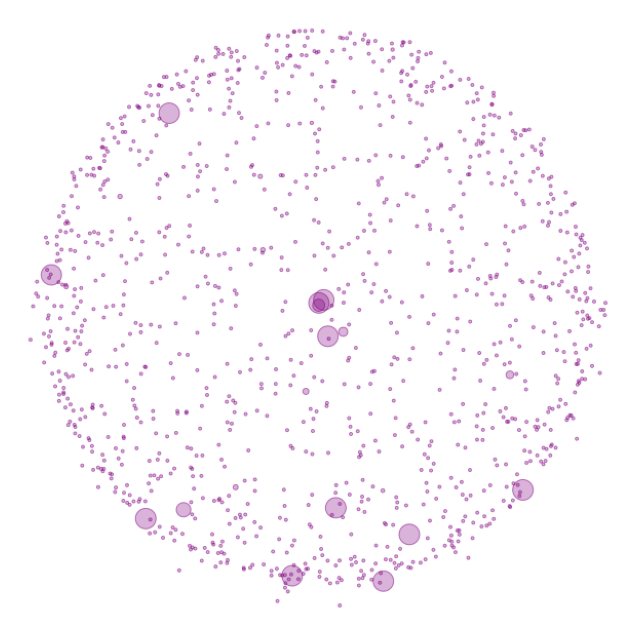

In [38]:
# Lee la imagen
image = plt.imread("grafico.png")

# Plotea la imagen
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

## Heat Map for matrix of interactions 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

adj_matrix = np.array(g_anime.get_adjacency().data)
print(adj_matrix)

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 1 1 0]]


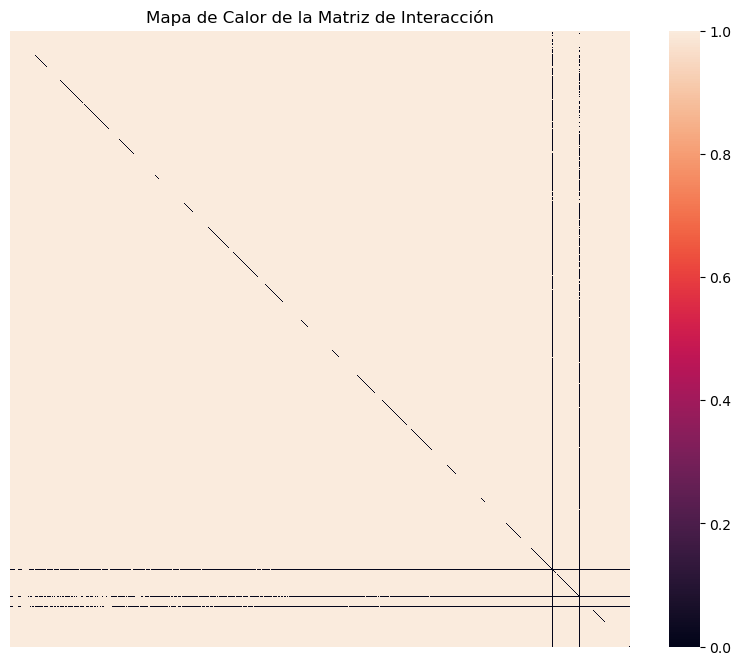

In [40]:
# Creamos el mapa de calor
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("rocket", as_cmap=True)
sns.heatmap(adj_matrix, cmap = cmap, cbar=True)
plt.title('Mapa de Calor de la Matriz de Interacción')
plt.xticks([])  # Elimina las etiquetas del eje X
plt.yticks([])  # Elimina las etiquetas del eje Y
plt.show()

**(a)** 
Caracterizar la centralidad de los nodos.

In [41]:
# Agregar las métricas de centralidad al DataFrame ANIMES
ANIMES = ANIMES.assign(
    Closeness_Weighted=g_anime.closeness( weights=g_anime.es['weight']),
    Closeness_Unweighted=g_anime.closeness(),
    Betweenness_Weighted=g_anime.betweenness(directed=False, weights=g_anime.es['weight']),
    Betweenness_Unweighted=g_anime.betweenness(directed=False),
    Eigenvector_Weighted=g_anime.eigenvector_centrality(directed=False, weights=g_anime.es['weight']),
    Eigenvector_Unweighted=g_anime.eigenvector_centrality(directed=False)
)

# Mostrar las primeras filas del DataFrame ANIMES con las nuevas columnas
ANIMES = ANIMES.merge(anime,left_on='anime',right_on="id",how="left")

In [42]:
# Ordenar el DataFrame por las medidas de centralidad y mostrar los 5 principales
top_closeness_weighted = ANIMES.sort_values(by='Closeness_Weighted', ascending=False).head(5)
top_closeness_unweighted = ANIMES.sort_values(by='Closeness_Unweighted', ascending=False).head(5)
top_betweenness_weighted = ANIMES.sort_values(by='Betweenness_Weighted', ascending=False).head(5)
top_betweenness_unweighted = ANIMES.sort_values(by='Betweenness_Unweighted', ascending=False).head(5)
top_eigenvector_weighted = ANIMES.sort_values(by='Eigenvector_Weighted', ascending=False).head(5)
top_eigenvector_unweighted = ANIMES.sort_values(by='Eigenvector_Unweighted', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 Animes con Mayor Closeness Weighted:")
print(top_closeness_weighted[['Name', 'Closeness_Weighted']])
print("\nTop 5 Animes con Mayor Closeness Unweighted:")
print(top_closeness_unweighted[['Name', 'Closeness_Unweighted']])
print("\nTop 5 Animes con Mayor Betweenness Weighted:")
print(top_betweenness_weighted[['Name', 'Betweenness_Weighted']])
print("\nTop 5 Animes con Mayor Betweenness Unweighted:")
print(top_betweenness_unweighted[['Name', 'Betweenness_Unweighted']])
print("\nTop 5 Animes con Mayor Eigenvector Weighted:")
print(top_eigenvector_weighted[['Name', 'Eigenvector_Weighted']])
print("\nTop 5 Animes con Mayor Eigenvector Unweighted:")
print(top_eigenvector_unweighted[['Name', 'Eigenvector_Unweighted']])


Top 5 Animes con Mayor Closeness Weighted:
                                     Name  Closeness_Weighted
1212              Hua Jianghu Zhi Xia Lan                0.55
1209   Ji Jia Shou Shen Zhi Baolie Feiche                0.54
1211         Doraon Yeongung Hong Gildong                0.53
1207  Yasai no Yousei: N.Y. Salad Special                0.52
920             Mono no Kamisama Cocotama                0.46

Top 5 Animes con Mayor Closeness Unweighted:
                                                  Name  Closeness_Unweighted
150                   Black Lagoon: The Second Barrage                  1.00
24   Watashi ga Motenai no wa Dou Kangaetemo Omaera...                  1.00
28              Fate/stay night: Unlimited Blade Works                  1.00
29                                       Trinity Seven                  1.00
30                                      Tokyo Ghoul √A                  1.00

Top 5 Animes con Mayor Betweenness Weighted:
                               

**(b)** 
Visualizar la red con un diseño adecuado teniendo en cuenta la centralidad d 
los nodos.

In [43]:
ig.summary(g_anime)

IGRAPH UNWT 1215 734206 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(c)** Identificar los puntos de articulación, los puntos aislados y las componentes.


In [44]:
# Descomponer el grafo y contar los componentes
componentes = g_anime.decompose()
num_componentes = len(componentes)

# Imprimir la longitud de cada componente y enumerarlas
i=0
for  componente in componentes:
    i=i+1
    longitud = len(componente.vs)
    print(f"Componente {i}: Longitud {longitud}")

Componente 1: Longitud 1215


In [45]:
# Encontrar los clanes en el grafo
clanes = g_anime.maximal_cliques()

# Imprimir el número de vértices en cada clan
print("Número de vértices por clan:")
for i, clan in enumerate(clanes, 1):
    num_vertices_clan = len(clan)
    print(f"Clan {i}: {num_vertices_clan} vértices")

Número de vértices por clan:
Clan 1: 52 vértices
Clan 2: 121 vértices
Clan 3: 170 vértices
Clan 4: 1212 vértices


In [46]:
g_anime.articulation_points()

[]

**(d)** Hacer la distribución de las distancia geodésica.


In [47]:
# Obtener los grados de salida y entrada de cada nodo
degree =g_anime.degree(mode='all')
strength=g_anime.strength(weights=g_anime.es['weight'])

# Crear DataFrames separados para los grados de salida y entrada
degree = pd.DataFrame(degree, columns=['degree'])
strength=pd.DataFrame(strength, columns=['strength'])
# Concatenar los DataFrames en uno solo
degree = pd.concat([degree, strength], axis=1)

degree

,degree,strength
0,1211,"1,277,112.00"
1,1213,"3,967,849.00"
2,1211,"1,559,897.00"
3,1212,"1,445,039.00"
4,1211,"29,579.00"
...,...,...
1210,1211,"3,732.00"
1211,1211,"2,293.00"
1212,1211,"2,528.00"
1213,1211,"3,900.00"


C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: fuerza.png
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 63'. Pick better value with 'binwidth'.
C:\Users\Cesar Prieto\AppData\Local\Temp\ipykernel_17800\4134862192.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 63'. Pick better value with 'binwidth'.


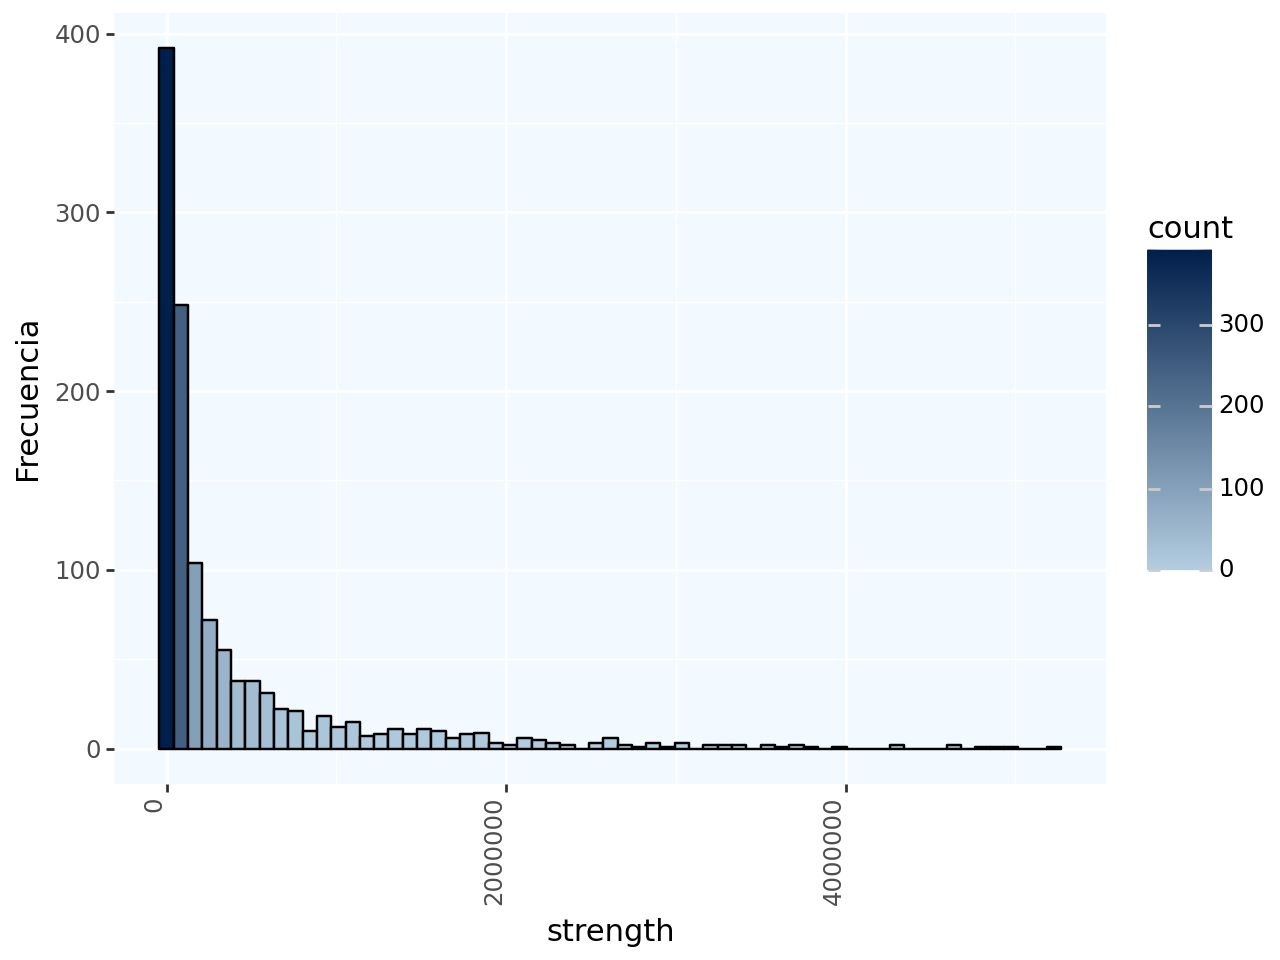

In [48]:
# Crear el histograma
histograma = (
    ggplot(degree, aes(x='strength', fill='..count..')) +  
    geom_histogram(color='black') +
    labs(title='', x='strength', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)
histograma.save("fuerza.png", dpi=300)
# Mostrar el histograma
print(histograma)

**(f)** Hacer un censo de los clanes y calcular el número clan.


In [49]:
ig.summary(g_anime)

IGRAPH UNWT 1215 734206 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [50]:
len(g_anime.largest_cliques()[0])

1212

**(g)** Calcular la densidad junto con el coeficiente de agrupamiento de la red.


In [51]:
g_anime.density()

0.9955268099877288

In [52]:
g_anime.transitivity_avglocal_undirected()# transitividad

0.9995894021485187

In [53]:
ig.summary(g_anime)

IGRAPH UNWT 1215 734206 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(h)** Particionar la red usando tres métodos de agrupamiento de su elección. Visualizar los resultados obtenidos.



In [54]:
random.seed(12)
ak_fg=g_anime.community_fastgreedy()

In [55]:
random.seed(12)
ak_im=g_anime.community_infomap()

In [56]:
random.seed(12)
ak_lp=g_anime.community_label_propagation()

In [57]:
random.seed(12)
ak_le=g_anime.community_leading_eigenvector()

In [58]:
random.seed(12)
ak_fg_w=g_anime.community_fastgreedy(weights=g_anime.es['weight'])

In [59]:
random.seed(12)
ak_im_w=g_anime.community_infomap(edge_weights= g_anime.es['weight'])

In [60]:
random.seed(12)
ak_lp_w=g_anime.community_label_propagation(weights= g_anime.es['weight'])

In [61]:
random.seed(12)
ak_le_w=g_anime.community_leading_eigenvector(weights= g_anime.es['weight'])

In [ ]:
random.seed(12)
#ak_eb_w=g_anime.community_edge_betweenness(weights=binario)

In [62]:
print("Modularidad de fastgreedy:", round(ak_fg.as_clustering().modularity, 3))
#print("Modularidad de edge betweenness:", round(ak_eb.as_clustering().modularity, 3))
print("Modularidad de infomap:", round(ak_im.modularity, 3))
print("Modularidad de label_propagation:", round(ak_lp.modularity, 3))
print("Modularidad de leading_eigenvector:", round(ak_le.modularity, 3))
#print("Modularidad de edge betweenness weighted:", round(ak_eb_w.as_clustering().modularity, 3))
print("Modularidad de fastgreedy weighted:", round(ak_fg_w.as_clustering().modularity, 3))
print("Modularidad de infomap weighted:", round(ak_im_w.modularity, 3))
print("Modularidad de label_propagation weighted:", round(ak_lp_w.modularity, 3))
print("Modularidad de leading_eigenvector weighted:", round(ak_le_w.modularity, 3))


Modularidad de fastgreedy: 0.0
Modularidad de infomap: 0.0
Modularidad de label_propagation: 0.0
Modularidad de leading_eigenvector: 0.0
Modularidad de fastgreedy weighted: 0.09
Modularidad de infomap weighted: 0.0
Modularidad de label_propagation weighted: 0.0
Modularidad de leading_eigenvector weighted: 0.09


In [71]:
graficoc=ig.plot(g_anime,
         edge_color =adjustcolor('gray',0.004),
        vertex_color= get_colors_for_list(ak_le_w.membership),
        vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
        layout=layout)
graficoc.save("graficoc.png")

In [72]:
set(ak_le_w.membership)

{0, 1, 2}

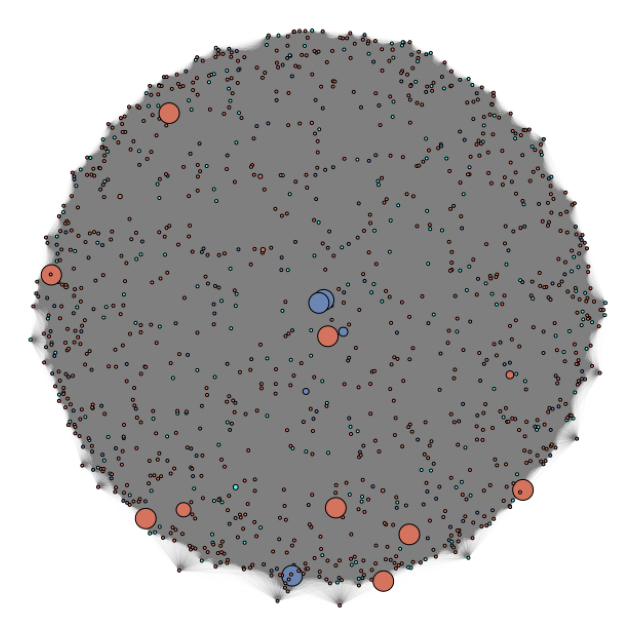

In [73]:
# Lee la imagen
image = plt.imread("graficoc.png")

# Plotea la imagen
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [76]:
shortest_paths = g_anime.distances(source=0,weights=g_anime.es['weight'])[0]

In [85]:
print(shortest_paths[:20]) #Mostrar los primero 20

[0.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0]


**(i)** Hacer un análisis de asortatividad de la red.


In [86]:
g_anime.assortativity_degree(directed=False)

-0.0033019322615186874

# Undirected Binary Animes Network

In [87]:
A=g_anime.get_adjacency(attribute = "weight")

In [88]:
g_anime.summary()

'IGRAPH UNWT 1215 734206 -- \n+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)'

In [89]:
conteo=(usuarios
.groupby(["anime_id"])
.agg(conteo=("anime_id","count")).reset_index()
)


In [90]:
conteo=(usuarios
.groupby(["anime_id"])
.agg(conteo=("anime_id","count")).reset_index()
)

usuarios=usuarios.merge(conteo,left_on="anime_id",right_on="anime_id",how="left")


In [91]:
conteo=usuarios['conteo']

In [92]:
A.shape[1]

1215

In [93]:
X = np.empty((0, A.shape[1]))

# Función que se aplicará a cada fila
def funcion(x, factor):
    return np.where(factor * 0.75 <= x, 1, 0)

# Iterar sobre los índices
for i in range(A.shape[0]):
    fila_transformada = funcion(A[i, :], usuarios['conteo'][i])
    X = np.vstack([X, fila_transformada])


In [94]:
g2=ig.Graph.Adjacency(X)

In [95]:
g_anime2=g2.as_undirected()

In [99]:
random.seed(12)
betweenness=g_anime2.betweenness()
max=np.max(betweenness)
g_anime2.vs['color'] = adjustcolor('pink',0.5)
grafico2=ig.plot(g_anime2,
               edge_color =adjustcolor('gray',0.025),
               vertex_frame_color =adjustcolor('purple',0.5),
               vertex_size=[25 if cg / max * 500 > 25 else (cg / max * 500 if cg / max * 500 > 3 else 3) for cg in betweenness],
               layout=layout)

grafico2.save("grafico2.png")

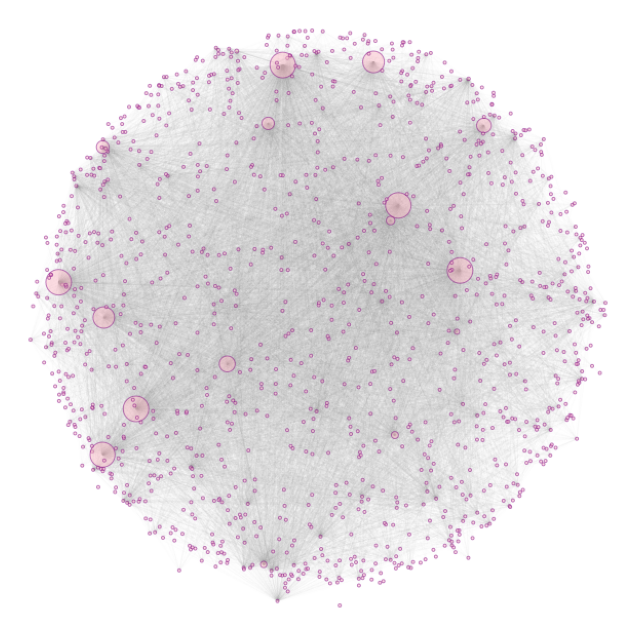

In [100]:
# Lee la imagen
image = plt.imread("grafico2.png")

# Plotea la imagen
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [101]:
ANIMES = pd.DataFrame((usuarios['anime_id'].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(usuarios['anime_id'].unique()), len(usuarios['user_id'].unique())) + range(len(usuarios['anime_id'].unique())))),  # Generar identificadores únicos
                      #ya hay identificadores unicos para todos los usuarios
                      # toca generar identificadores unicos para todos los animes
                 index=['anime', 'Identificador']).T  # Transponer para obtener un DataFrame
# Agregar las métricas de centralidad al DataFrame ANIMES
ANIMES = ANIMES.assign(
   
    Closeness_Unweighted=g_anime2.closeness(),

    Betweenness_Unweighted=g_anime2.betweenness(directed=False),

    Eigenvector_Unweighted=g_anime2.eigenvector_centrality(directed=False)
)

# Mostrar las primeras filas del DataFrame ANIMES con las nuevas columnas
ANIMES = ANIMES.merge(anime,left_on='anime',right_on="id",how="left")

# Ordenar el DataFrame por las medidas de centralidad y mostrar los 5 principales
top_closeness_unweighted = ANIMES.sort_values(by='Closeness_Unweighted', ascending=False).head(5)
top_betweenness_unweighted = ANIMES.sort_values(by='Betweenness_Unweighted', ascending=False).head(5)
top_eigenvector_unweighted = ANIMES.sort_values(by='Eigenvector_Unweighted', ascending=False).head(5)

# Mostrar los resultados
print("\nTop 5 Animes con Mayor Closeness Unweighted:")
print(top_closeness_unweighted[['Name', 'Closeness_Unweighted']])
print("\nTop 5 Animes con Mayor Betweenness Unweighted:")
print(top_betweenness_unweighted[['Name', 'Betweenness_Unweighted']])
print("\nTop 5 Animes con Mayor Eigenvector Unweighted:")
print(top_eigenvector_unweighted[['Name', 'Eigenvector_Unweighted']])


Top 5 Animes con Mayor Closeness Unweighted:
                                                  Name  Closeness_Unweighted
54                                        Cowboy Bebop                  0.99
126                                             Trigun                  0.86
110  91 Days: Toki no Asase/Subete no Kinou/Ashita,...                  0.86
339                                        Ranma ½ OVA                  0.82
43                                Imouto sae Ireba Ii.                  0.75

Top 5 Animes con Mayor Betweenness Unweighted:
                                                  Name  Betweenness_Unweighted
54                                        Cowboy Bebop              124,483.68
110  91 Days: Toki no Asase/Subete no Kinou/Ashita,...               55,746.07
126                                             Trigun               48,291.48
339                                        Ranma ½ OVA               38,429.21
43                                Imouto sae Ireb

In [102]:

# Obtener los grados de salida y entrada de cada nodo
degree =g_anime2.degree(mode='all')

# Crear DataFrames separados para los grados de salida y entrada
degree = pd.DataFrame(degree, columns=['degree'])

degree

,degree
0,39
1,91
2,39
3,33
4,1
...,...
1210,0
1211,0
1212,0
1213,0


C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: degree.png
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 313'. Pick better value with 'binwidth'.
C:\Users\Cesar Prieto\AppData\Local\Temp\ipykernel_17800\2505921819.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Cesar Prieto\miniconda3\envs\Articulo\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 313'. Pick better value with 'binwidth'.


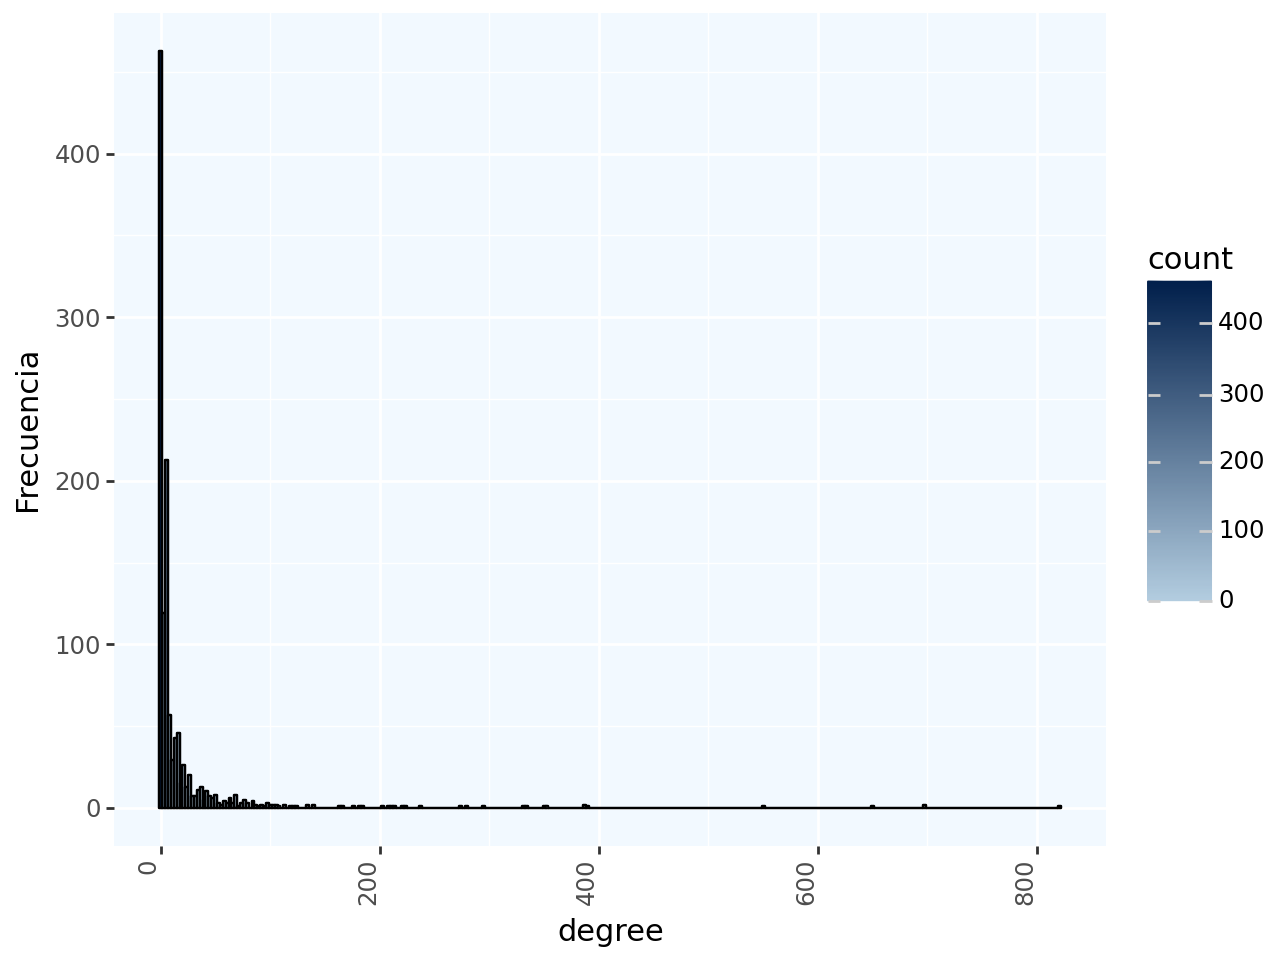

In [103]:
# Crear el histograma
histogramadegree = (
    ggplot(degree, aes(x='degree', fill='..count..')) +  
    geom_histogram(color='black') +
    labs(title='', x='degree', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)
histogramadegree.save("degree.png", dpi=300)
# Mostrar el histograma
print(histogramadegree)

In [104]:

g_anime2.density()

0.015525318472417136

In [105]:
 g_anime2.transitivity_avglocal_undirected()# transitividad

0.9226266172025401

In [109]:
 g_anime2 =  g_anime2.clusters().giant()

C:\Users\Cesar Prieto\AppData\Local\Temp\ipykernel_17800\1297444792.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead


In [111]:
random.seed(12)
ak_fg=g_anime2.community_fastgreedy()
ak_im=g_anime2.community_infomap()
ak_lp=g_anime2.community_label_propagation()
#ak_le=g_anime2.community_leading_eigenvector()

print("Modularidad de fastgreedy:", round(ak_fg.as_clustering().modularity, 3))
print("Modularidad de infomap:", round(ak_im.modularity, 3))
print("Modularidad de label_propagation:", round(ak_lp.modularity, 3))
#print("Modularidad de leading_eigenvector:", round(ak_le.modularity, 3))

Modularidad de fastgreedy: 0.229
Modularidad de infomap: 0.0
Modularidad de label_propagation: 0.0


In [112]:
set(ak_le.membership)

{0, 1}

In [ ]:
random.seed(12)
layout = g_anime2.layout_davidson_harel()

In [ ]:

ig.plot(g_anime2,
        edge_color =adjustcolor('gray',0.1),
        vertex_color= get_colors_for_list(ak_le.membership,alpha=0.7),
        vertex_size=[20 if cg / max * 500 > 20 else (cg / max * 500 if cg / max * 500 > 5 else 5) for cg in g_anime2.betweenness()],
        layout=layout)